# Final Project - Train

## Set Up!

In [2]:
!pip install -q -r /content/drive/MyDrive/Recsys_final/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 33.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6

In [3]:
!pip install -q blosc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse as sps

## Loading Data

In [46]:
recipes = pd.read_csv("/content/drive/MyDrive/Recsys_final/data/RAW_recipes.csv")
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [47]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [48]:
users = pd.read_csv("/content/drive/MyDrive/Recsys_final/data/PP_users.csv")
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25076 entries, 0 to 25075
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   u           25076 non-null  int64 
 1   techniques  25076 non-null  object
 2   items       25076 non-null  object
 3   n_items     25076 non-null  int64 
 4   ratings     25076 non-null  object
 5   n_ratings   25076 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


In [49]:
users.head()

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


In [50]:
ratings = pd.read_csv("/content/drive/MyDrive/Recsys_final/data/RAW_interactions.csv")
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [51]:
ratings.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [52]:
train = pd.read_csv("/content/drive/MyDrive/Recsys_final/data/interactions_train.csv")
train.head()

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


In [53]:
val = pd.read_csv("/content/drive/MyDrive/Recsys_final/data/interactions_validation.csv")
val.head()

,user_id,recipe_id,date,rating,u,i
0,76535,33627,2005-02-15,4.0,5,177317
1,160497,75307,2005-10-24,4.0,23,170785
2,930021,100961,2008-11-30,4.0,31,165555
3,58439,154105,2007-03-24,4.0,44,177453
4,628951,14525,2008-02-16,5.0,45,142367


In [54]:
test = pd.read_csv("/content/drive/MyDrive/Recsys_final/data/interactions_test.csv")
test.head()

,user_id,recipe_id,date,rating,u,i
0,8937,44551,2005-12-23,4.0,2,173538
1,56680,126118,2006-10-07,4.0,16,177847
2,349752,219596,2008-04-12,0.0,26,89896
3,628951,82783,2007-11-13,2.0,45,172637
4,92816,435013,2013-07-31,3.0,52,177935


## Basic Statistics




*   How many items are in the data set?
* How many users?
* How many ratings?

In [ ]:
ratings[['user_id', 'recipe_id']].nunique()

user_id      226570
recipe_id    231637
dtype: int64

In [ ]:
len(ratings)

1132367

User Activity

---


* What is the distribution of ratings-per-user?

First we have to find the rating count and mean of each user!

In [ ]:
user_stats = ratings.groupby('user_id')['rating'].agg(['count', 'mean','sum']).rename(columns={'count': 'rating_count'})
user_stats

,rating_count,mean,sum
user_id,,,
1533,128,4.710938,603
1535,794,4.473552,3552
1581,1,5.000000,5
1634,60,3.616667,217
1676,31,4.677419,145
...,...,...,...
2002371755,1,5.000000,5
2002371792,1,4.000000,4
2002371843,1,5.000000,5


Here is the distribution with ecdf plot!

<Axes: xlabel='rating_count', ylabel='Proportion'>

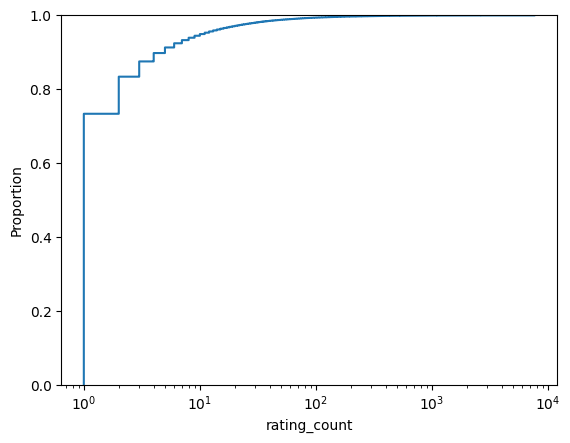

In [ ]:
sns.ecdfplot(x=user_stats['rating_count'], log_scale=True)


Item Statistics

---


*   What is the item popularity curve (the distribution of ratings-per-item)?




First we have to find the rating count, mean, and sum of each movie!

In [ ]:
item_stats = ratings.groupby('recipe_id')['rating'].agg(['count', 'mean','sum']).rename(columns={'count': 'rating_count'})
item_stats

,rating_count,mean,sum
recipe_id,,,
38,4,4.250000,17
39,1,3.000000,3
40,9,4.333333,39
41,2,4.500000,9
43,1,1.000000,1
...,...,...,...
537459,1,5.000000,5
537485,1,5.000000,5
537543,1,0.000000,0


Here is the distribution shown with ecdf plot!

<Axes: xlabel='rating_count', ylabel='Proportion'>

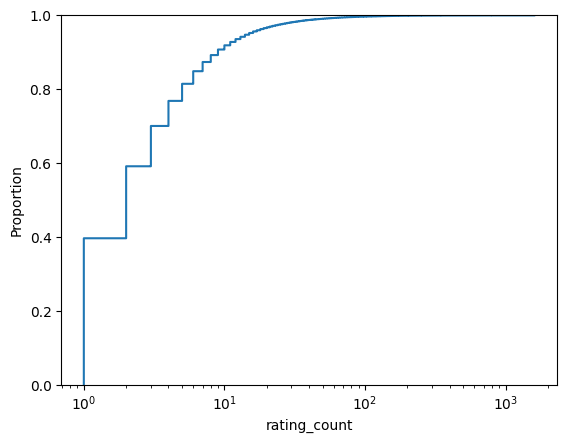

In [ ]:
sns.ecdfplot(x=item_stats['rating_count'], log_scale=True)



*   What is the distribution of average ratings for items?




Here is the the distribution shown with hist plot!

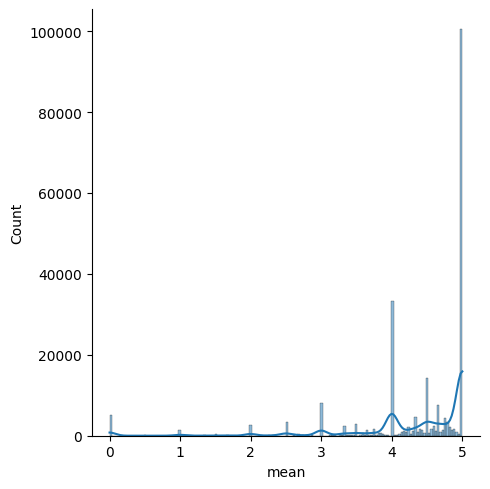

In [ ]:
sns.displot(item_stats['mean'], kde=True)

Text(0, 0.5, 'Cumulative Frac. of Ratings')

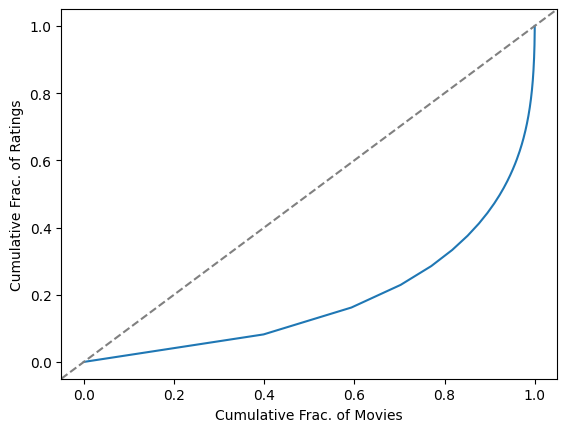

In [ ]:
item_stats.sort_values('rating_count', inplace=True)
item_stats['tot_rank_frac'] = (np.arange(len(item_stats)) + 1) / len(item_stats)
item_stats['cum_frac'] = item_stats['rating_count'].cumsum() / item_stats['rating_count'].sum()
plt.plot(item_stats['tot_rank_frac'], item_stats['cum_frac'])
plt.axline((0,0), slope=1, color='grey', linestyle='dashed')
plt.xlabel("Cumulative Frac. of Movies")
plt.ylabel("Cumulative Frac. of Ratings")

## Converting tags to CSV

In [11]:
recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [21]:
ratings

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [16]:
import ast
# Convert the string representation of list to actual list
def string_to_list(s):
    try:
        return ast.literal_eval(s)
    except ValueError:
        return []

# Creating the original dataframe
recipes['tags'] = recipes['tags'].apply(string_to_list)

# Explode the 'tags' column to create a new row for each tag
tags_exploded = recipes.explode('tags')

# Drop duplicates and reset index
unique_tags = tags_exploded['tags'].drop_duplicates().reset_index(drop=True).reset_index()
unique_tags.columns = ['tag_id', 'tag']

unique_tags.head()

,tag_id,tag
0,0,60-minutes-or-less
1,1,time-to-make
2,2,course
3,3,main-ingredient
4,4,cuisine


In [18]:
unique_tags.to_csv("/content/drive/MyDrive/Recsys_final/data/tags.csv")

In [35]:
item_tag_df = tags_exploded.merge(unique_tags, left_on='tags', right_on='tag', how='left')

# Select the necessary columns and rename them
item_tag_df = item_tag_df[['id', 'tag_id']]
item_tag_df.columns = ['item_id', 'tag_id']

item_tag_df.head()

,item_id,tag_id
0,137739,0
1,137739,1
2,137739,2
3,137739,3
4,137739,4


In [40]:
item_tag_df.to_parquet("/content/drive/MyDrive/Recsys_final/data/item-tags.parquet")

## Split Data:

In [ ]:
!chmod +x /content/drive/MyDrive/Recsys_final/split-data.py

In [ ]:
!python /content/drive/MyDrive/Recsys_final/split-data.py

INFO:split-data:reading ratings
INFO:lenskit.crossfold:partitioning 872021 rows for 23086 users into 5 partitions
INFO:lenskit.crossfold:fold 0: selecting test ratings
INFO:lenskit.crossfold:fold 0: partitioning training data
INFO:split-data:writing partition 0
INFO:lenskit.crossfold:fold 1: selecting test ratings
INFO:lenskit.crossfold:fold 1: partitioning training data
INFO:split-data:writing partition 1
INFO:lenskit.crossfold:fold 2: selecting test ratings
INFO:lenskit.crossfold:fold 2: partitioning training data
INFO:split-data:writing partition 2
INFO:lenskit.crossfold:fold 3: selecting test ratings
INFO:lenskit.crossfold:fold 3: partitioning training data
INFO:split-data:writing partition 3
INFO:lenskit.crossfold:fold 4: selecting test ratings
INFO:lenskit.crossfold:fold 4: partitioning training data
INFO:split-data:writing partition 4


## Run Algorithms


In [5]:
!chmod +x /content/drive/MyDrive/Recsys_final/train-recommend.py

In [11]:
!python /content/drive/MyDrive/Recsys_final/train-recommend.py POP

2024-03-19 15:15:57.974187: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 15:15:57.974257: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 15:15:57.976688: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-19 15:15:57.985496: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-19 15:15:59.439975: W tensorflow/compiler/tf2

In [14]:
!python /content/drive/MyDrive/Recsys_final/train-recommend.py TAG

2024-03-19 17:32:34.424815: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 17:32:34.424889: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 17:32:34.435724: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-19 17:32:34.466253: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-19 17:32:37.400024: W tensorflow/compiler/tf2

In [15]:
!python /content/drive/MyDrive/Recsys_final/train-recommend.py U-KNN

Streaming output truncated to the last 5000 lines.
INFO:lenskit.batch._recommend:recommended for 4617 users in 3m36.35s
INFO:train-recommend:received 53157 recommendations for part 1
INFO:lenskit.topn:analyzing 53157 recommendations (23085 truth rows)
INFO:lenskit.topn:using rec key columns ['user']
INFO:lenskit.topn:using truth key columns ['user']
INFO:lenskit.topn:numbering truth lists
INFO:lenskit.topn:numbering rec lists
INFO:lenskit.topn:collecting metric results
INFO:lenskit.topn:measured 2660 lists in  98ms
--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/usr/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/usr/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: n